In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./Data_File/train.csv")
test_df = pd.read_csv("./Data_File/test.csv")
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Feature**</br>
Passengerld : 승객 번호 </br>
Survived : 생존 여부 - 생존시 1 / 사망시 0 </br>
Pclass : 객실 등급 - 숫자가 낮을수록 높은 등급의 객실 </br>
Name : 이름 </br>
Sex : 성별 </br>
Age : 나이 </br>
SibSp : 동반한 형제자매, 배우자 수 </br>
Parch : 동반한 부모, 자식 수 </br>
Ticket : 티켓 종류 </br>
Fare : 요금 </br>
Cabin : 객실 번호 </br>
Embarked : 승선 장소 </br>

### **Feature 분석**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. PassengerId** </br>

<Axes: >

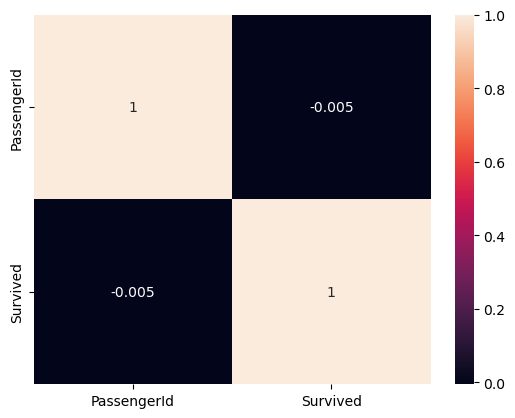

In [4]:
# Checking the correlation

sv_pid = train_df[['PassengerId', 'Survived']]
corr = sv_pid.corr()

sns.heatmap(corr, annot = True)

<Axes: xlabel='Survived', ylabel='PassengerId'>

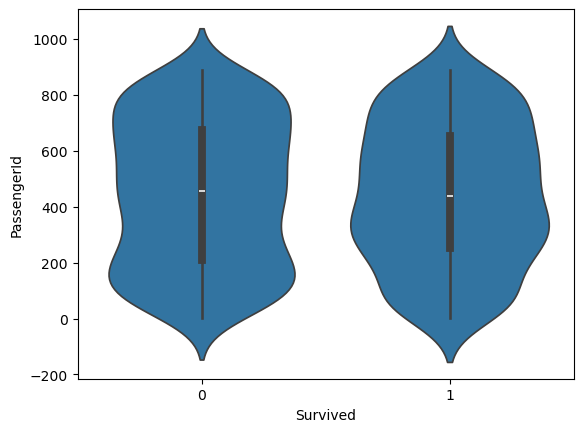

In [5]:
# Checking the violin plot for survived distribuion
sns.violinplot(x = train_df['Survived'], y = train_df['PassengerId'])

상관도도 낮으며 Label과의 유의미한 분포를 찾기 힘듦 </br>
추가적으로 PassengerId라는 feature는 단순 순서를 나타낸 표기로 보이므로 학습에 유의미한 영향을 주지는 않을 것으로 확인</br>
-> drop

**2. Pcalss**

<Axes: >

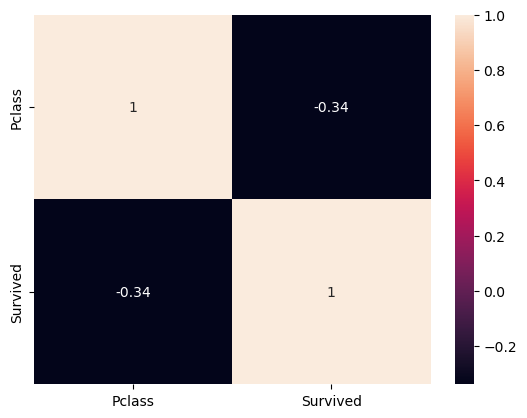

In [6]:
# Checking the correlation

sv_pc = train_df[['Pclass', 'Survived']]
corr = sv_pc.corr()

sns.heatmap(corr, annot = True)

<Axes: xlabel='Pclass', ylabel='Survived'>

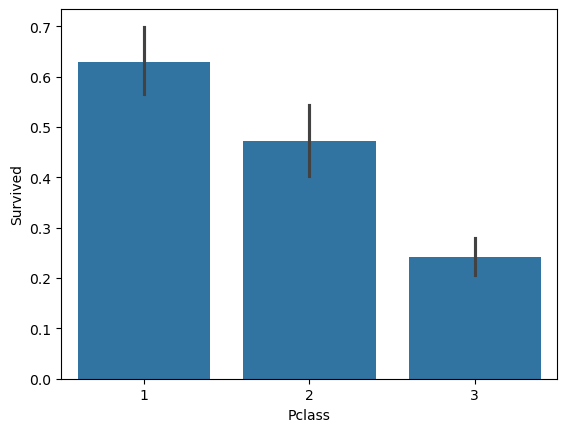

In [7]:
# Checking the violin plot for survived mean distribuion
sns.barplot(y = train_df['Survived'], x = train_df['Pclass'])

유의미한 상관도와 Pclass에 따른 생존률이 눈에 뛰게 차이가 남 </br>
Pclass feature는 category성으로 Encoding이 필요함 </br>
1\. Label Encoding / 2\. OneHot Encoding </br>
(단, Pclass 값 자체가 1, 2, 3으로 나누어져 있으므로, 별도의 Label Encoding 작업은 필요하지 않음)

**Name** </br></br>
csv파일을 확인한 결과 feature 데이터는 ' 이름, 호칭 성 (기혼 여성일 시 기존 성) ' 의 형식을 띄우고 있다. </br>
생각해볼 가능성</br>
1\. 호칭에 따른 결과 - Mr, Mrs, Miss, Master, . . . </br>
2\. 성씨(가문)에 따른 결과

1번

In [8]:
# Transforming train data Name to Title
Title_list_train = list()
for str in train_df['Name']:
    str1 = str.split(', ')[1]
    str2 = str1.split('.')[0]
    Title_list_train.append(str2)

title_version_train = train_df.copy(deep = True)

title_version_train['Title'] = Title_list_train
title_version_train.drop('Name', axis = 1, inplace = True)

In [9]:
# Checking value_counts of train data
title_version_train['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [10]:
# Transforming test data Name to Title
Title_list_test = list()
for str in test_df['Name']:
    str1 = str.split(', ')[1]
    str2 = str1.split('.')[0]
    Title_list_test.append(str2)

title_version_test = test_df.copy(deep = True)

title_version_test['Title'] = Title_list_test
title_version_test.drop('Name', axis = 1, inplace = True)

In [11]:
# Checking value_counts of train data
title_version_test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [12]:
# drop some title_version_train index except which are in title_version_test
drop_title = ['Mlle', 'Major', 'the Countess', 'Capt', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer']
drop_index = list()
for title in drop_title:
    index = title_version_train[title_version_train['Title'] == title].index.tolist()
    drop_index.append(index)
    
drop_index = sum(drop_index,[])

title_version_train.drop(drop_index, axis = 0, inplace = True)

In [13]:
title_version_train['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Rev         6
Col         2
Ms          1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

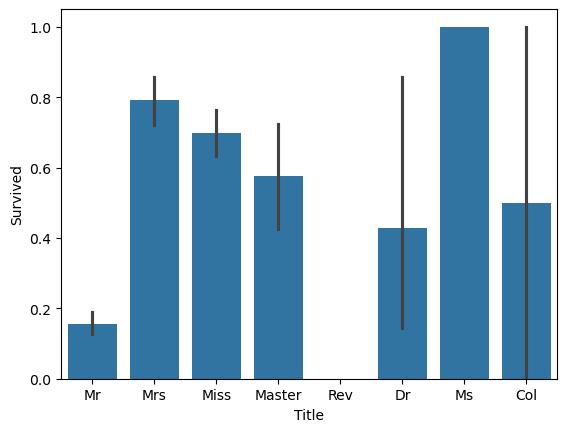

In [14]:
sns.barplot(x = title_version_train['Title'], y= title_version_train['Survived'])

호칭에 따른 유의미한 생존율의 차이를 보여준다. 특히 가장 수가 많은 Mr이지만, 오히려 생존율은 뒤에서 2 번째 일정도로 낮다</br>

2번

In [15]:
# Transforming train data Name to Family
Family_list_train = list()
for str in train_df['Name']:
    str1 = str.split(', ')[1]
    str2 = str1.split('. ')[1]
    if '(' in str2:
        str3 = str2.split(' (')[0]
        Family_list_train.append(str3)
    else:
        Family_list_train.append(str2)

Family_version_train = train_df.copy(deep = True)

Family_version_train['Family'] = Family_list_train
Family_version_train.drop('Name', axis = 1, inplace = True)

In [16]:
# Checking value_counts of train data
Family_version_train['Family'].value_counts()

Family
William                11
John                   10
James                   9
Mary                    6
Joseph                  5
                       ..
Howard Hugh "Harry"     1
Hudson Trevor           1
Margaret                1
Laura Mabel             1
Karl Howell             1
Name: count, Length: 729, dtype: int64

In [17]:
# Checking the number of unique values
print("Number of unique values : ", Family_version_train['Family'].nunique())

Number of unique values :  729


유의미한 카테고리를 가지지 못하므로, 가문을 기준으로 분류는 하지 않는 것으로 한다

Name은 Title를 기준으로 변경하는 것이 좋은 방안으로 보이며 </br>
category성으로 Label Encoding 혹은 OneHot Encoding을 적용시킨다

**Sex**

<Axes: xlabel='Sex', ylabel='Survived'>

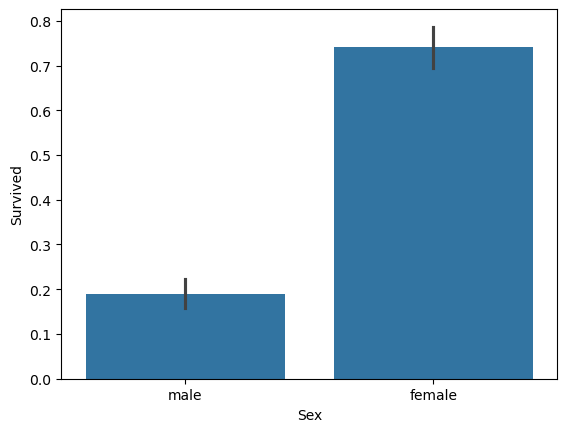

In [18]:
# Checking the survived mean distribution
sns.barplot(x = train_df['Sex'], y = train_df['Survived'])

In [19]:
# Checking the value counts()
train_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
# Checking the number by group
sex_group = train_df.groupby(['Survived', 'Sex'])
sex_group['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

전체 수는 male이 더 많지만, 사망자 생존자의 격차가 크게 나타나는 유의미한 feature로 확인 </br>
category성 데이터로 Label Encoding 혹은 OneHot Encoding 적용

**Age**

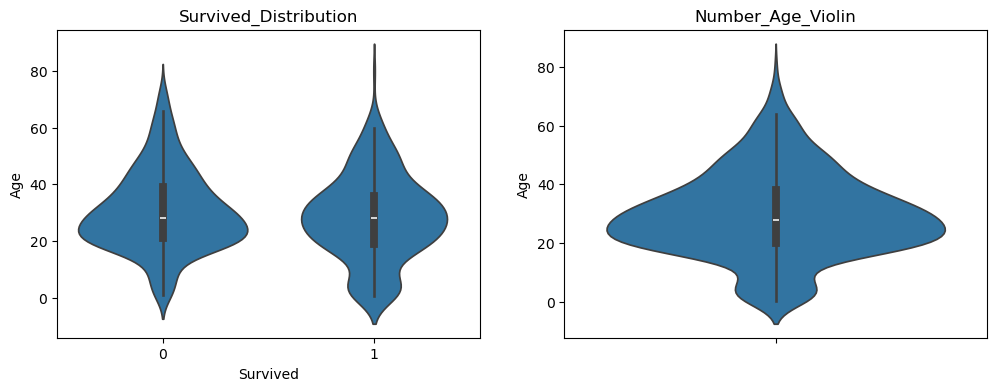

In [21]:
# Checking the distribution graph ver
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.violinplot(y = train_df['Age'], x = train_df['Survived'],ax = ax[0])
sns.violinplot(y=train_df['Age'], ax = ax[1])

ax[0].set_title('Survived_Distribution')
ax[1].set_title('Number_Age_Violin')

plt.show()

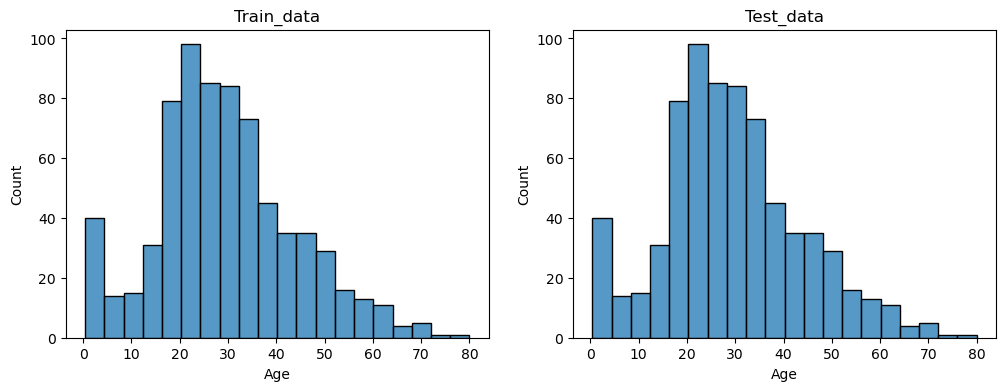

In [22]:
# Cheking the Age distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

sns.histplot(x=train_df['Age'], ax = ax[0])
sns.histplot(x=train_df['Age'], ax = ax[1])

ax[0].set_title('Train_data')
ax[1].set_title('Test_data')

plt.show()

In [23]:
# Divide Age into 9 selections
def Age_Conversion(age):
    title = ''
    if age <= 5:
        title = 'Baby'
    elif age <= 10:
        title = 'Baby_Child'
    elif age <= 16:
        title = 'Child'
    elif age <= 28:
        title = 'Young_Adult'
    elif age <= 36:
        title = 'OB'
    elif age <= 44:
        title = 'Adult'
    elif age <= 52:
        title = 'Old_Adult'
    elif age <= 64:
        title = 'Senior'
    else:
        title = 'Grand'

    return title
        

In [24]:
# Transforming Age to selection_ver
Age_version_train = train_df.copy(deep = True)

Age_version_train['Age_selection'] = train_df['Age'].apply(lambda x : Age_Conversion(x))
Age_version_train.drop('Age', axis = 1, inplace = True)

Age_version_test = test_df.copy(deep = True)

Age_version_test['Age_selection'] = test_df['Age'].apply(lambda x : Age_Conversion(x))
Age_version_test.drop('Age', axis = 1, inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_14472\1289035303.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
C:\Users\user\AppData\Local\Temp\ipykernel_14472\1289035303.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)


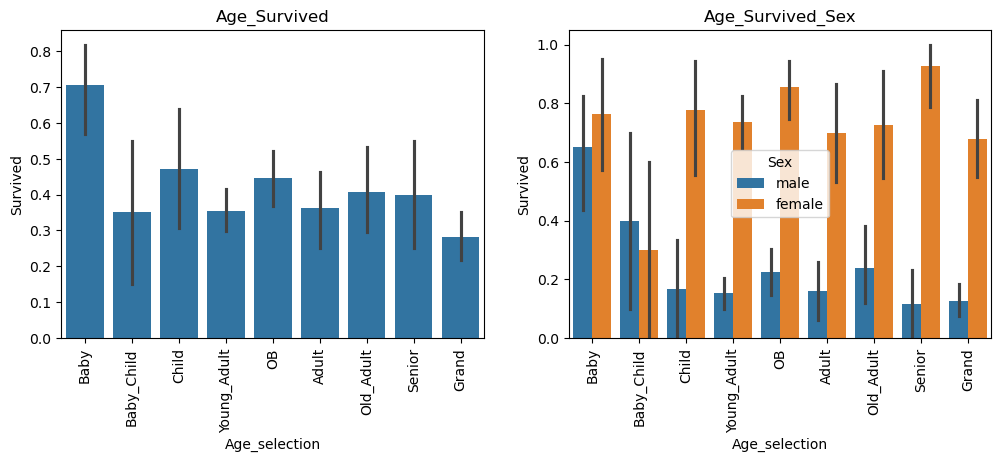

In [25]:
# Checking survived mean distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

Age_list = ['Baby', 'Baby_Child', 'Child', 'Young_Adult', 'OB', 'Adult', 'Old_Adult', 'Senior', 'Grand']

sns.barplot(x = Age_version_train['Age_selection'], y = Age_version_train['Survived'],ax = ax[0], order = Age_list)
sns.barplot(x = Age_version_train['Age_selection'], y = Age_version_train['Survived'], hue = Age_version_train['Sex'], ax = ax[1], order = Age_list)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

ax[0].set_title('Age_Survived')
ax[1].set_title('Age_Survived_Sex')

plt.show()

Selection 결과 성별로 breakdown한 barplot을 보면 특정 나이대에서 유의미한 수치가 나오는 것을 볼 수 있다</br>
Age를 그대로 사용해도 되며, Selection형태로 사용해도 된다 - 분류에 있어 selection형태가 더 좋은 성능이 기대된다</br>
만약 Selection형태로 사용하게 된다면 category성이므로 Encoding을 적용 시킨다

**SibSp, Parch**

<Axes: >

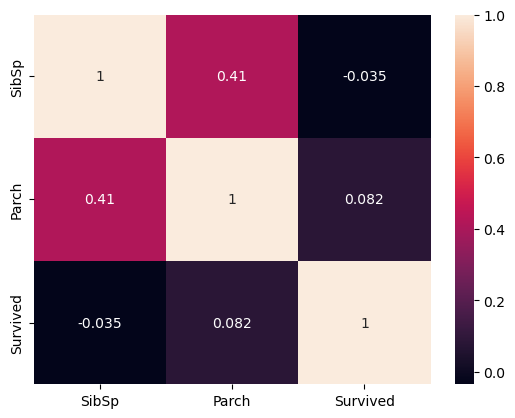

In [26]:
# Checking the correlation
corr = train_df[['SibSp', 'Parch', 'Survived']].corr()
sns.heatmap(corr, annot = True)

In [27]:
# Checking value_counts
print("Train Data")
print(train_df['SibSp'].value_counts())
print("-"*40)
print(train_df['Parch'].value_counts())
print("\n\n")
print("Test Data")
print(test_df['SibSp'].value_counts())
print("-"*40)
print(test_df['Parch'].value_counts())

Train Data
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
----------------------------------------
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64



Test Data
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
----------------------------------------
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64


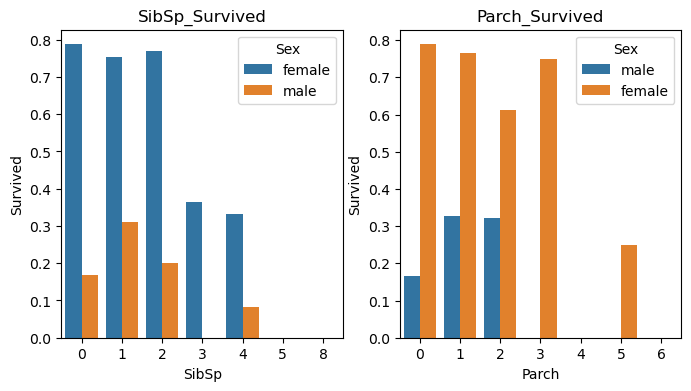

In [28]:
# Checking survived mean distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,4))

order_list = ['male', 'female']

sns.barplot( x = 'SibSp', y = 'Survived', data = train_df, ax = ax[0], errorbar = None, hue = 'Sex')
sns.barplot( x = 'Parch', y = 'Survived', data = train_df, ax = ax[1], errorbar = None, hue = 'Sex')

ax[0].set_title('SibSp_Survived')
ax[1].set_title("Parch_Survived")

plt.show()

In [29]:
# Checking survived num groupby
SibSp_group = train_df.groupby(['Survived', 'SibSp', 'Sex'])
Parch_group = train_df.groupby(['Survived', 'Parch', 'Sex'])

print(SibSp_group['Survived'].count())
print("-"*50)
print(Parch_group['Survived'].count())

Survived  SibSp  Sex   
0         0      female     37
                 male      361
          1      female     26
                 male       71
          2      female      3
                 male       12
          3      female      7
                 male        5
          4      female      4
                 male       11
          5      female      1
                 male        4
          8      female      3
                 male        4
1         0      female    137
                 male       73
          1      female     80
                 male       32
          2      female     10
                 male        3
          3      female      4
          4      female      2
                 male        1
Name: Survived, dtype: int64
--------------------------------------------------
Survived  Parch  Sex   
0         0      female     41
                 male      404
          1      female     14
                 male       39
          2      female     19
    

In [30]:
# Combine feature SibSp and Parch to Family
Family_ver = train_df.copy(deep = True)

Family_ver['Family'] = Family_ver['SibSp'] + Family_ver['Parch']
Family_ver.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

test_F_ver = test_df.copy(deep = True)
test_F_ver['Family'] = test_F_ver['SibSp'] + test_F_ver['Parch']
test_F_ver.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

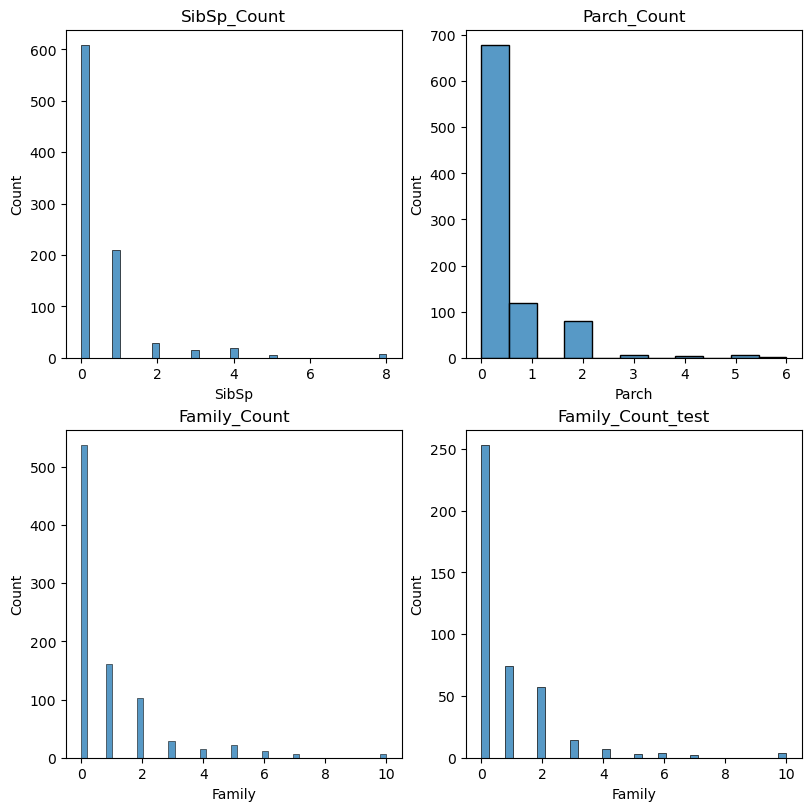

In [31]:
# Checking num distribution
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8), constrained_layout=True)

sns.histplot(x = train_df['SibSp'], ax = ax[0][0])
sns.histplot(x = train_df['Parch'], ax = ax[0][1])
sns.histplot(x = Family_ver['Family'], ax = ax[1][0])
sns.histplot(x = test_F_ver['Family'], ax = ax[1][1])

ax[0][0].set_title('SibSp_Count')
ax[0][1].set_title('Parch_Count')
ax[1][0].set_title('Family_Count')
ax[1][1].set_title('Family_Count_test')

plt.show()

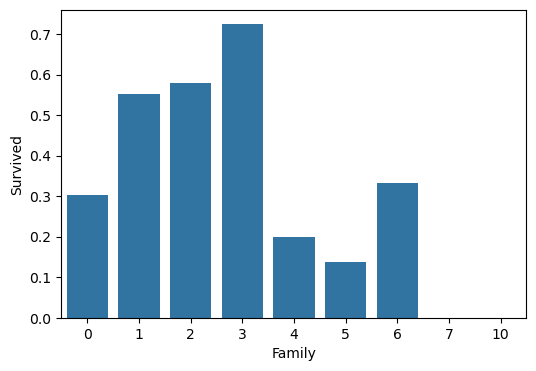

In [32]:
# Checking survived mean distribution
plt.figure(figsize = (6,4))
sns.barplot(x = 'Family', y = 'Survived', data = Family_ver, errorbar = None)
plt.show()

SibSp과 Parch는 서로 연관도가 높은데, 이는 하나의 가족이기 때문이라고 볼 수 있다 </br>
예를 들면, 가족 여행을 간다 하였을 때 부모와 자식들 뿐만 아니라 대가족 형태라면 SibSp과 Parch를 모두 가지게 된다 </br>
이렇게 된다면 데이터 상 train, test 모두 둘의 형상이 크게 다르지 않기에 Family라는 하나의 feature로 묶어서 사용하는 것이 가능하다고 파악된다

**Ticket**

In [33]:
# Checking value counts
train_df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

csv 파일 확인 결과 특정한 규칙을 찾아내기 어려움 </br>
또한 unique의 수가 너무 많아 category처리도 불가능 </br>
-> drop

**Fare**

<Axes: >

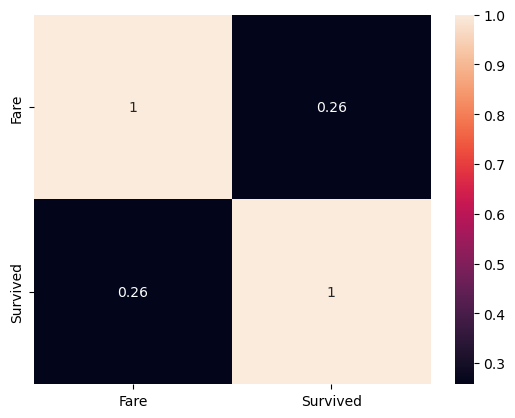

In [34]:
# Checking correlation
corr = train_df[['Fare', 'Survived']].corr()

sns.heatmap(corr, annot = True)

<Axes: xlabel='Survived', ylabel='Fare'>

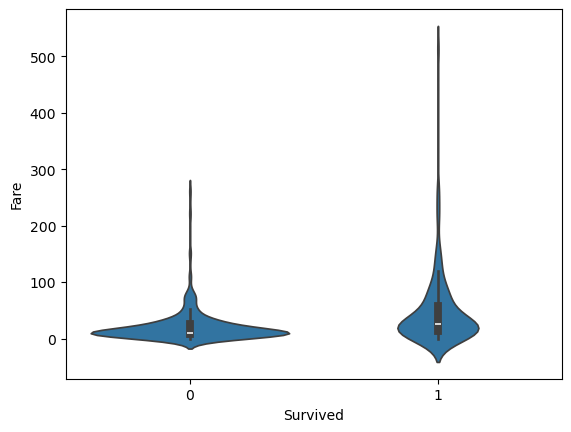

In [35]:
# Checking violin survived distribution
sns.violinplot(x = train_df['Survived'], y = train_df['Fare'])

C:\Users\user\AppData\Local\Temp\ipykernel_14472\3555360196.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 90)
C:\Users\user\AppData\Local\Temp\ipykernel_14472\3555360196.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation = 90)


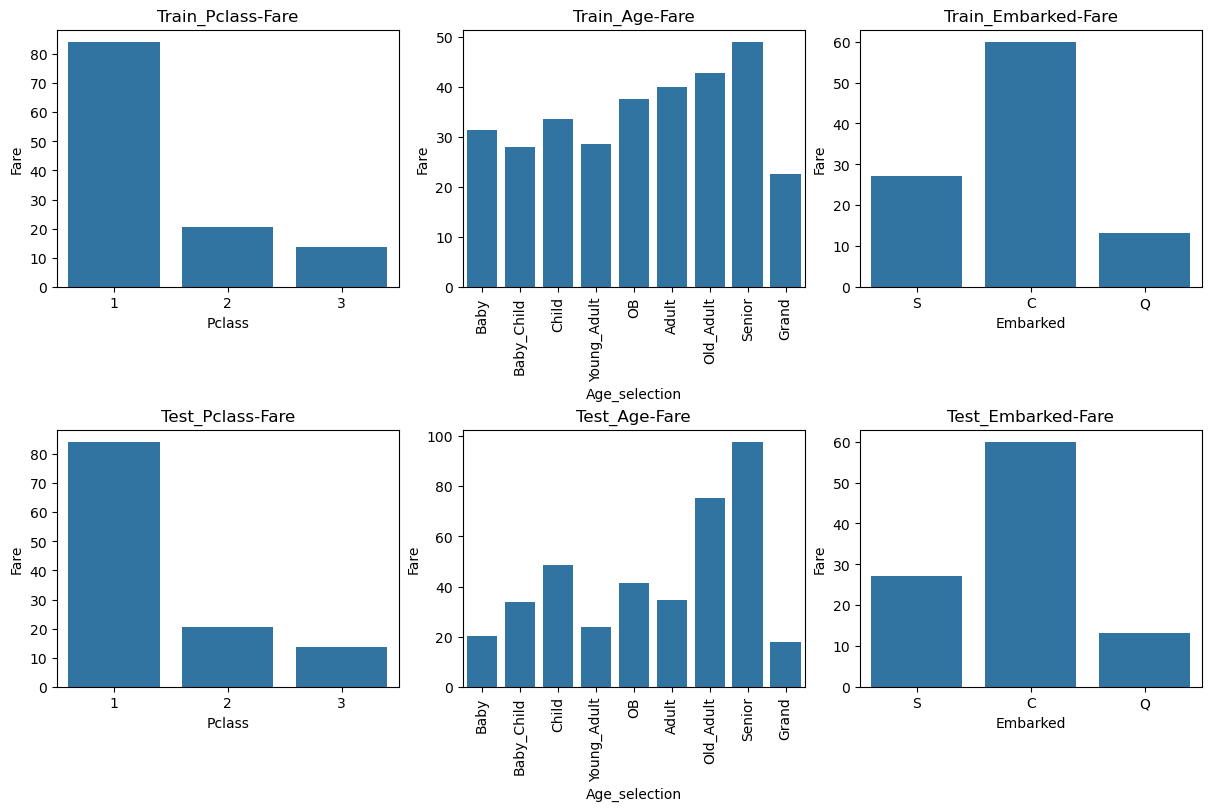

In [42]:
# Checking rating with other features
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8), constrained_layout=True)

Age_list = ['Baby', 'Baby_Child', 'Child', 'Young_Adult', 'OB', 'Adult', 'Old_Adult', 'Senior', 'Grand']

sns.barplot(x = 'Pclass', y = 'Fare', data = train_df, ax = ax[0][0], errorbar = None)
sns.barplot(x = 'Age_selection', y = 'Fare', data = Age_version_train, ax = ax[0][1], errorbar = None, order = Age_list)
sns.barplot(x = 'Embarked', y = 'Fare', data = train_df, ax = ax[0][2], errorbar = None)
sns.barplot(x = 'Pclass', y = 'Fare', data = train_df, ax = ax[1][0], errorbar = None)
sns.barplot(x = 'Age_selection', y = 'Fare', data = Age_version_test, ax = ax[1][1], errorbar = None, order = Age_list)
sns.barplot(x = 'Embarked', y = 'Fare', data = train_df, ax = ax[1][2], errorbar = None)

ax[0][1].set_xticklabels(ax[0][1].get_xticklabels(), rotation = 90)
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation = 90)

ax[0][0].set_title('Train_Pclass-Fare')
ax[0][1].set_title('Train_Age-Fare')
ax[0][2].set_title('Train_Embarked-Fare')
ax[1][0].set_title('Test_Pclass-Fare')
ax[1][1].set_title('Test_Age-Fare')
ax[1][2].set_title('Test_Embarked-Fare')

plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

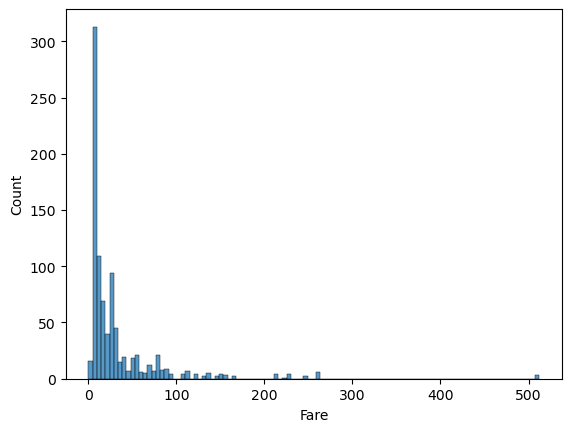

In [37]:
# Checking fare distribution
sns.histplot(x = train_df['Fare'])

<Axes: xlabel='Fare', ylabel='Count'>

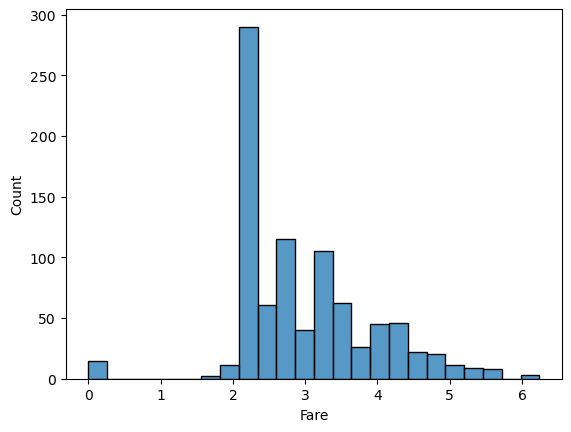

In [38]:
# Log conversion
log_fare = np.log1p(train_df['Fare'])
log_version = train_df.copy(deep = True)
log_version['Fare'] = log_fare
sns.histplot(x = log_version['Fare'])

<Axes: xlabel='Survived', ylabel='Fare'>

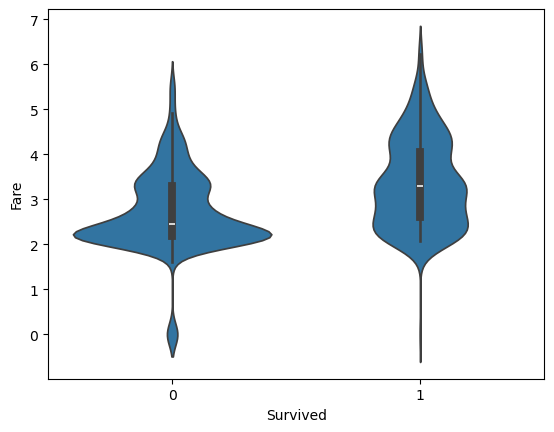

In [39]:
# Checking violin survived distribution of log version
sns.violinplot(x = log_version['Survived'], y = log_version['Fare'])

Fare는 특성에 맞게 다른 feature과 유의미한 관계를 가지는 것으로 보인다 </br>
하지만, 예상외로 Age랑은 크게 연관은 없는 것으로 파악된다 </br>
그리고 또한 Embarked에서 탑승지가 C인 곳은 Fare가 높은 것으로 보아 C에서 출발하는 가격은 비싼 것으로 보인다 (여행 거리가 긴다든 지)</br></br>
분포를 확인한 결과 Right skwe를 확인 가능한데, 이때 log 변환을 통해 분포를 변환시키면 violinplot으로 보았을 때, Fare에 따른 생존율이 좀 더 직관적으로 파악 가능해진다 </br>
따라서 log 변환을 할 시 모델이 분류하는 것에 좀 더 도움을 줄 수 있는 것으로 파악

**Cabin**

In [43]:
# Checking value_counts
train_df['Cabin'].value_counts(dropna = False)

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64
----------------------------------------


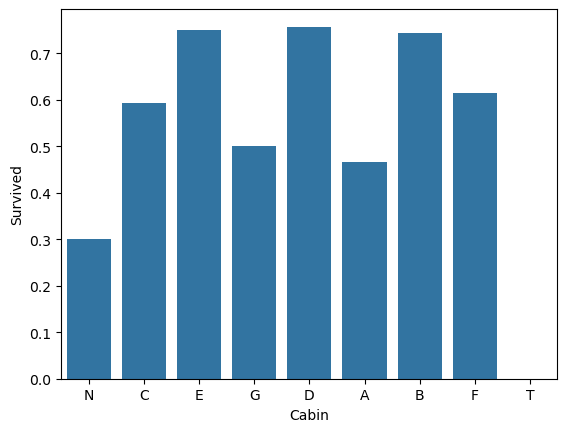

In [56]:
# Just using Alphabet of Cabin
cabin_version = train_df.copy(deep = True)
cabin_version['Cabin'] = cabin_version['Cabin'].fillna('N')

new_cabin = list()
for str in cabin_version['Cabin']:
    new_cabin.append(str[0])
    
cabin_version['Cabin'] = new_cabin
print(cabin_version['Cabin'].value_counts())
print("-"*40)

sns.barplot(x = 'Cabin', y = 'Survived', data = cabin_version, errorbar = None)
plt.show()

In [58]:
# Checking test data
cabin_version_test = test_df.copy(deep = True)
cabin_version_test['Cabin'] = cabin_version_test['Cabin'].fillna('N')

new_cabin = list()
for str in cabin_version_test['Cabin']:
    new_cabin.append(str[0])
    
cabin_version_test['Cabin'] = new_cabin
print(cabin_version_test['Cabin'].value_counts())

Cabin
N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64


NaN값이 너무 많아서 사용하기에 애매한 부분이 존재 </br>
충돌 시간은 늦은 23시 40분경이었기에, 호실에 따른 탈출 속도가 다를 수 있다고 생각이 됨</br>
이 feature을 사용한다면 category성이므로 Encoding을 적용시키며, 성능 하락이 예상된다면 drop </br>
csv파일을 봤을 때, 한 명이 여러 방을 구매한 경우도 많음</br>
가족 단위일 시 1명의 이름으로 예약을 하므로 이게 반영되어 NaN이 많은 걸로 추정이 되며 drop하는 것이 좋을 듯 함

**Embarked**

<Axes: xlabel='Embarked', ylabel='Survived'>

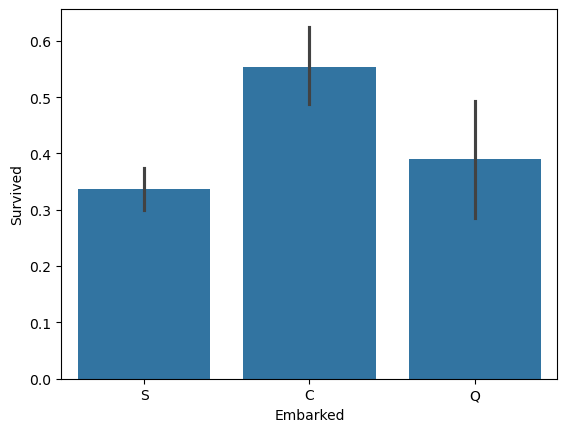

In [59]:
# Checking survived mean distribution
sns.barplot(x = train_df['Embarked'], y = train_df['Survived'])

가격은 S가 Q보다 비싼 것으로 확인 되었는데, 생존율은 Q가 더 높다 </br>
이는 위치와 관련이 있는 것으로 보이며 이는 Cabin이 Embarked에 따라 배정되었을 것이라는 추측 가능</br>
탑승지에 따른 Fare와 Survived 관계가 유의미하므로 feature에 포함 시키며 </br>
category성 데이터이므로 Encoding을 적용시킨다

**학습에 무의미한 feature 삭제**

In [3]:
def delete_feature(df):
    drop_list = ['PassengerId', 'Name', 'Ticket', 'Embarked']
    for drop_ele in drop_list:
        df.drop(drop_ele, axis = 1, inplace = True)
    return df

### **Feature NaN, data-type 확인**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


</br>**Null값이 있는 feautre** : Age, Cabin </br></br>
**Age**</br>
1\. 평균값 처리 </br>
2\. 해당 index 삭제 </br></br>
**Cabin** </br>
NaN값이 너무 많으므로 새로운 문자열을 할당한다 -> 'N'

Age-mean 처리

In [5]:
def Age_NaN1(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    return df

Age-index 삭제

In [6]:
def Age_NaN2(df):
    index = df[df['Age'].isna() == True].index.tolist()
    df.drop(index, axis = 0, inplace = True)
    return df

Cabin-'N' 치환

In [7]:
def Cabin_NaN1(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    return df

Cabin-삭제

In [8]:
def Cabin_NaN2(df):
    df.drop('Cabin', axis = 1, inplace = True)
    return df

**object형인 feature** : Sex, Cabin </br></br>
**Sex**</br>
성별이므로 카테고리성 OneHotEncoding/LabelEncoding 처리</br></br>
**Cabin**</br>
객실마다 모두 번호가 다르므로 맨 앞 알파벳만 뽑은 후 OneHotEncoding/LabelEncoding 처리

Sex-OneHotEncoding

In [9]:
def Sex_Encoding1(df):
    from sklearn.preprocessing import OneHotEncoder
    df_sex = pd.get_dummies(df['Sex'], dummy_na = False)
    df['female'] = df_sex['female']
    df['male'] = df_sex['male']
    df.drop('Sex', axis = 1, inplace = True)
    return df

Sex-LabelEncoding

In [10]:
def Sex_Encoding2(df):
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    df_sex = label.fit_transform(df['Sex'])
    df['Sex_encoded'] = df_sex
    df.drop('Sex', axis = 1, inplace = True)
    return df

Cabin-알파벳 치환 + OneHotEncoding

In [11]:
def Cabin_Encoding1(df):
    from sklearn.preprocessing import OneHotEncoder
    Cabin_list = df['Cabin'].values.tolist()
    for index, element in enumerate(Cabin_list):
        Cabin_list[index] = element[0]
    replace_cabin = pd.DataFrame(Cabin_list, columns = ['Cabin_encoded'])
    df_cabin = pd.get_dummies(replace_cabin, dummy_na = False)
    df2 = pd.concat([df,df_cabin], axis = 1)
    df2.drop('Cabin', axis = 1, inplace = True)
    df2
    # df2 새로운 객체를 반환하므로 함수 호출 시 train_df = Cabin_Encoding1(train_df) 사용
    return df2

Cabin-알파벳 치환 + LabelEncoding

In [12]:
def Cabin_Encoding2(df):
    from sklearn.preprocessing import LabelEncoder
    Cabin_list = df['Cabin'].values.tolist()
    for index, element in enumerate(Cabin_list):
        Cabin_list[index] = element[0]
    label = LabelEncoder()
    Cabin_list = label.fit_transform(Cabin_list)
    df['Cabin_encoded'] = Cabin_list
    df.drop('Cabin', axis = 1, inplace = True)
    return df

### **Feature와 Label의 분포 확인**

In [13]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("./Data_File/train.csv")
delete_feature(train_df)
Age_NaN1(train_df)
Cabin_NaN2(train_df)
Sex_Encoding2(train_df)

train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<Axes: >

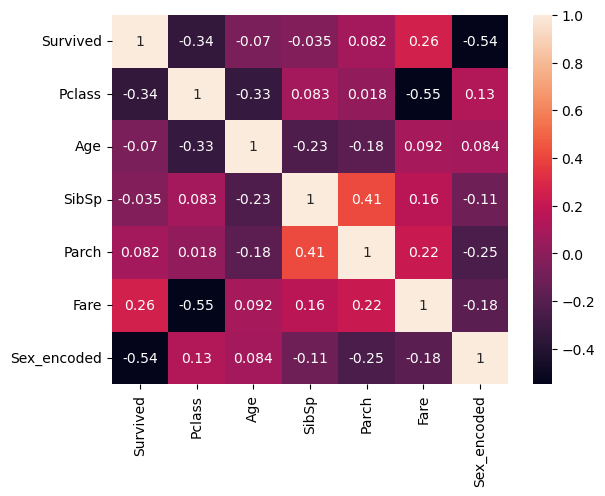

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = train_df.corr()
sns.heatmap(corr, annot = True)

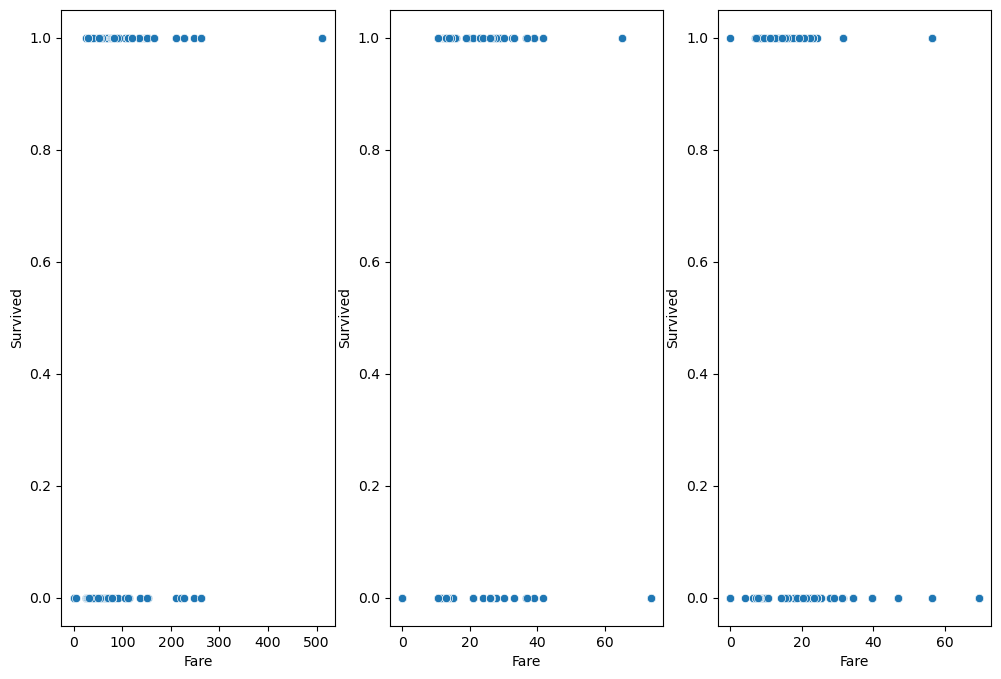

In [15]:

fig, ax = plt.subplots( nrows = 1, ncols = 3, figsize = (12, 8))


class1_df = train_df[train_df['Pclass'] == 1]
class2_df = train_df[train_df['Pclass'] == 2]
class3_df = train_df[train_df['Pclass'] == 3]

sns.scatterplot(x = class1_df['Fare'], y = class1_df['Survived'], ax = ax[0])
sns.scatterplot(x = class2_df['Fare'], y = class2_df['Survived'], ax = ax[1])
sns.scatterplot(x = class3_df['Fare'], y = class3_df['Survived'], ax =ax[2])

plt.show()

**Survived와 상관도가 가장 높은 연속형 feature인 Fare 이상치 제거**

In [16]:
def Fare_IQR(df):
    ndarray = df['Fare'].values
    iqr75 = np.percentile(ndarray, 75)
    iqr25 = np.percentile(ndarray, 25)
    iqr = iqr75 - iqr25
    max = iqr75 + 1.5 * iqr
    min = iqr25 - 1.5 * iqr

    cond1 = df['Fare'] > max
    cond2 = df['Fare'] < min

    drop_index1 = df[cond1].index
    drop_index2 = df[cond2].index

    df.drop(drop_index1, axis = 0, inplace = True)
    df.drop(drop_index2, axis = 0, inplace = True)

    return df

In [17]:
Fare_IQR(train_df)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
0,0,3,22.000000,1,0,7.2500,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
5,0,3,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


**Fare 분포 확인(왜도)**

<Axes: >

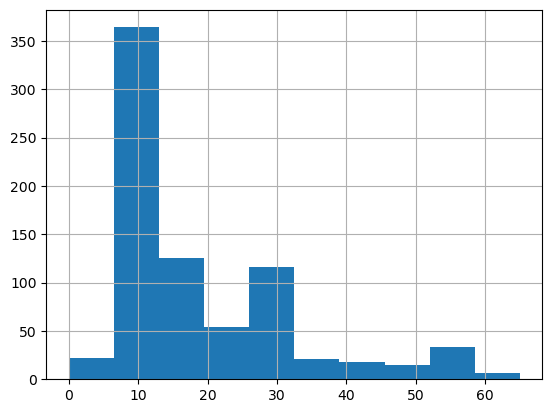

In [18]:
train_df['Fare'].hist()

Fare - log conversion

In [19]:
def Fare_log(df):
    df['Fare'] = np.log1p(df['Fare'])
    return df

<Axes: >

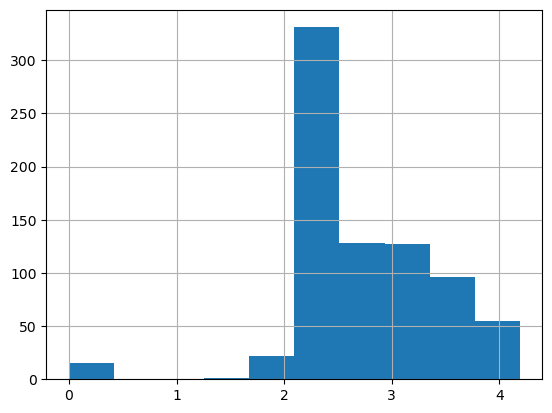

In [25]:
train_df['Fare'].hist()

In [20]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
count,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.339355,2.48000,29.103880,0.437419,0.340645,17.822091,0.685161
std,0.473796,0.73439,12.779988,0.899838,0.785914,13.578085,0.464752
min,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.00000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.00000,29.699118,0.000000,0.000000,13.000000,1.000000
75%,1.000000,3.00000,34.000000,1.000000,0.000000,26.000000,1.000000
max,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000,1.000000


데이터 가공 - cross_val 모델 자체 평가(split안한)로 모델들 고르기 - 튜닝 - voting

데이터 함부로 삭제하지 말고 label과 관련도부터 보고 결정

cross_val 할 때 split안한 것을 넣는 듯

데이터 세트가 너무 작기에 split 안하고 자체 cross나 grid 결과의 mean으로 정확도 대체하는 것이 좋을수도

feature_selection과 같은 데이터 가공도 생각해보기 